# Analysing theAvailability of Sheffield's Student Accommodation market & the effects of COVID19

Webscapping Rightmove (Up to Sepember): https://www.rightmove.co.uk/student-accommodation/find.html?locationIdentifier=REGION%5E1195&insId=1

In [370]:
import pandas as pd
import numpy as np

#Webscrapping
from bs4 import BeautifulSoup
import requests
from time import sleep

#pre-processing
import re
from datetime import date, timedelta, datetime
import datetime

#data visulation
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from numpy import mean

In [371]:
data_path = 'Datasets/'
file_db = 'rightmove_db'
file_out = 'rightmove_preproc'
master_name = '_master'


#define month:: >
month_name='_september21'


In [372]:
file_ds=data_path+file_db+month_name+'.csv'
file_preproc=data_path+file_out+month_name+'.csv'
master_preproc=data_path+file_out+master_name+'.csv'

# Data Mining >
##### Webscapping Rightmove

In [4]:
urlrm = "https://www.rightmove.co.uk/student-accommodation/find.html?locationIdentifier=REGION%5E1195&insId=1"


##sources: 
#property address: #property-88390132 > div > div > div.propertyCard-content > div.propertyCard-section > div.propertyCard-details
#Property description: #property-88390132 > div > div > div.propertyCard-content > div.propertyCard-section > div.propertyCard-description
#PRICE: #property-88390132 > div > div > div.propertyCard-header > div 
#UPDATE: #property-88390132 > div > div > div.propertyCard-contacts > span
#AGENT/lANDLOARD: #property-88390132 > div > div > div.propertyCard-contacts > div:nth-child(2) > div > a

#link #property-88613663 > div > div > div.propertyCard-content > div.propertyCard-section > div.propertyCard-description > a

In [5]:
import time
%timeit


#iterations = range(24, 1800, 24)
iterations = range(24, 300, 24)

#url eg.
#https://www.rightmove.co.uk/student-accommodation/find.html?locationIdentifier=REGION%5E1195&propertyTypes=&mustHave=&dontShow=&furnishTypes=&keywords=
#https://www.rightmove.co.uk/student-accommodation/find.html?locationIdentifier=REGION%5E1195&index=24&propertyTypes=&mustHave=&dontShow=&furnishTypes=&keywords=    
#https://www.rightmove.co.uk/student-accommodation/find.html?locationIdentifier=REGION%5E1195&index=48&propertyTypes=&mustHave=&dontShow=&furnishTypes=&keywords=
    
urls = []


rmbaseurl = "https://www.rightmove.co.uk/student-accommodation/find.html?locationIdentifier=REGION%5E1195&index="
rmendurl = "&propertyTypes=&mustHave=&dontShow=&furnishTypes=&keywords="    
    
    
for i in iterations:
    start_at= str(i)
    url = rmbaseurl + start_at + rmendurl
    urls.append(url)
    print(urls)

['https://www.rightmove.co.uk/student-accommodation/find.html?locationIdentifier=REGION%5E1195&index=24&propertyTypes=&mustHave=&dontShow=&furnishTypes=&keywords=']
['https://www.rightmove.co.uk/student-accommodation/find.html?locationIdentifier=REGION%5E1195&index=24&propertyTypes=&mustHave=&dontShow=&furnishTypes=&keywords=', 'https://www.rightmove.co.uk/student-accommodation/find.html?locationIdentifier=REGION%5E1195&index=48&propertyTypes=&mustHave=&dontShow=&furnishTypes=&keywords=']
['https://www.rightmove.co.uk/student-accommodation/find.html?locationIdentifier=REGION%5E1195&index=24&propertyTypes=&mustHave=&dontShow=&furnishTypes=&keywords=', 'https://www.rightmove.co.uk/student-accommodation/find.html?locationIdentifier=REGION%5E1195&index=48&propertyTypes=&mustHave=&dontShow=&furnishTypes=&keywords=', 'https://www.rightmove.co.uk/student-accommodation/find.html?locationIdentifier=REGION%5E1195&index=72&propertyTypes=&mustHave=&dontShow=&furnishTypes=&keywords=']
['https://www

In [6]:
#'price': None if item < titles else prices[item]
    
descrip_prop = []
update = []
address = []
price = []
agent_landlord = []
link = []

for url in urls:

    response = requests.get(url)

    print("Parsing url: ",url)
    print()
    if (response.status_code == 200):
        wait_time = np.random.randint(1,5)
        sleep(wait_time)
        soup = BeautifulSoup(response.content, "html.parser")
        #elems = soup.select("div.lister-item-content > h3 > a")
        num_iter = len(soup.select("div.propertyCard-content"))

        for i in range(num_iter):
            try:
 
                descrip_prop.append(soup.select("div.propertyCard-content > div.propertyCard-section > div.propertyCard-description")[i].get_text())
                address.append(soup.select("div.propertyCard-content > div.propertyCard-section > div.propertyCard-details")[i].get_text())
                agent_landlord.append(soup.select("div.propertyCard-contacts > div:nth-child(2) > div > a")[i]["title"])
                price.append(soup.select("div.propertyCard-header > div")[i].get_text())
                update.append(soup.select("div.propertyCard-contacts > span")[i].get_text())
                link.append(soup.select("div.propertyCard-section > div.propertyCard-description > a")[i]["href"])
            except IndexError:
                continue

        print()

Parsing url:  https://www.rightmove.co.uk/student-accommodation/find.html?locationIdentifier=REGION%5E1195&index=24&propertyTypes=&mustHave=&dontShow=&furnishTypes=&keywords=


Parsing url:  https://www.rightmove.co.uk/student-accommodation/find.html?locationIdentifier=REGION%5E1195&index=48&propertyTypes=&mustHave=&dontShow=&furnishTypes=&keywords=


Parsing url:  https://www.rightmove.co.uk/student-accommodation/find.html?locationIdentifier=REGION%5E1195&index=72&propertyTypes=&mustHave=&dontShow=&furnishTypes=&keywords=


Parsing url:  https://www.rightmove.co.uk/student-accommodation/find.html?locationIdentifier=REGION%5E1195&index=96&propertyTypes=&mustHave=&dontShow=&furnishTypes=&keywords=


Parsing url:  https://www.rightmove.co.uk/student-accommodation/find.html?locationIdentifier=REGION%5E1195&index=120&propertyTypes=&mustHave=&dontShow=&furnishTypes=&keywords=


Parsing url:  https://www.rightmove.co.uk/student-accommodation/find.html?locationIdentifier=REGION%5E1195&index=1

In [7]:
print(len(descrip_prop),
len(update),
len(address),
len(price),
len(agent_landlord),
len(link))

300 300 300 300 300 300


In [8]:
#DataFrame: 
rightmove_db = pd.DataFrame({'Property_address': address, 'Agent_landlord_name' : agent_landlord, 'Description_property': descrip_prop, 'RM_website_update': update, 'Price': price, "RM_website_shortlink": link})

In [9]:
rightmove_db = rightmove_db.drop_duplicates()

In [10]:
rightmove_db.head()

,Property_address,Agent_landlord_name,Description_property,RM_website_update,Price,RM_website_shortlink
0,\n\n\n Studio flat \n\n\n\nS...,"Haybrook Lettings, Sheffield",\n\nCity Living - Call us on to view this furn...,Added on 27/08/2021,\n\n£650 pcm\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,/properties/112541735#/?channel=STU_LET
1,\n\n\n Studio flat \n\n\n\nP...,"West One Student Accommodation, Sheffield",\n\nAVAILABLE NOW**PORTERBROOK LUXURY APARTMEN...,Added on 21/09/2021,\n\n£650 pcm\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,/properties/88183136#/?channel=STU_LET
2,\n\n\n Studio flat \n\n\n\nB...,"Belvoir, Sheffield",\n\nWell presented FURNISHED STUDIO flat in th...,Added on 21/09/2021,\n\n£450 pcm\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,/properties/113784371#/?channel=STU_LET
3,\n\n\n 5 bedroom terraced house ...,"MorfittSmith, Sheffield",\n\nA tremendous home for a BIG FAMILY or a GR...,Added on 20/09/2021,\n\n£950 pcm\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,/properties/113758145#/?channel=STU_LET
4,\n\n\n 1 bedroom apartment \...,"MorfittSmith, Sheffield",\n\nA wonderfully presented 1-bed apartment in...,Added on 20/09/2021,\n\n£585 pcm\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,/properties/113743484#/?channel=STU_LET


In [11]:
rightmove_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 0 to 299
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Property_address      289 non-null    object
 1   Agent_landlord_name   289 non-null    object
 2   Description_property  289 non-null    object
 3   RM_website_update     289 non-null    object
 4   Price                 289 non-null    object
 5   RM_website_shortlink  289 non-null    object
dtypes: object(6)
memory usage: 15.8+ KB


In [12]:
rightmove_db.shape

(289, 6)

In [14]:
#save to CSV
rightmove_dbsave= rightmove_db
rightmove_dbsave.to_csv(file_ds, index=False)

In [15]:
rightmove_db

,Property_address,Agent_landlord_name,Description_property,RM_website_update,Price,RM_website_shortlink
0,\n\n\n Studio flat \n\n\n\nS...,"Haybrook Lettings, Sheffield",\n\nCity Living - Call us on to view this furn...,Added on 27/08/2021,\n\n£650 pcm\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,/properties/112541735#/?channel=STU_LET
1,\n\n\n Studio flat \n\n\n\nP...,"West One Student Accommodation, Sheffield",\n\nAVAILABLE NOW**PORTERBROOK LUXURY APARTMEN...,Added on 21/09/2021,\n\n£650 pcm\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,/properties/88183136#/?channel=STU_LET
2,\n\n\n Studio flat \n\n\n\nB...,"Belvoir, Sheffield",\n\nWell presented FURNISHED STUDIO flat in th...,Added on 21/09/2021,\n\n£450 pcm\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,/properties/113784371#/?channel=STU_LET
3,\n\n\n 5 bedroom terraced house ...,"MorfittSmith, Sheffield",\n\nA tremendous home for a BIG FAMILY or a GR...,Added on 20/09/2021,\n\n£950 pcm\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,/properties/113758145#/?channel=STU_LET
4,\n\n\n 1 bedroom apartment \...,"MorfittSmith, Sheffield",\n\nA wonderfully presented 1-bed apartment in...,Added on 20/09/2021,\n\n£585 pcm\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,/properties/113743484#/?channel=STU_LET
...,...,...,...,...,...,...
294,\n\n\n 6 bedroom apartment \...,"MAF Properties, Sheffield",\n\nThis apartment is finished to the highest ...,Added on 27/03/2021,"\n\n£2,600 pcm\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...",/properties/113493239#/?channel=STU_LET
295,\n\n\n Studio flat \n\n\n\n6...,"Smart Moves, Bradford",\n\nThese Apartments are in High Demand Please...,Reduced on 24/03/2021,\n\n£607 pcm\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,/properties/89158984#/?channel=STU_LET
297,\n\n\n Studio flat \n\n\n\nP...,"Smart Moves, Bradford",\n\n***BILLS INCLUDED- NO ADMIN FEES*** Welcom...,Reduced on 24/03/2021,\n\n£585 pcm\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,/properties/88247893#/?channel=STU_LET
298,\n\n\n Studio flat \n\n\n\nP...,"Smart Moves, Bradford",\n\n***BILLS INCLUDED- NO ADMIN FEES*** Welcom...,Reduced on 24/03/2021,\n\n£585 pcm\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,/properties/73890265#/?channel=STU_LET


# Data Pre-Processing >

In [16]:
rightmove_df=rightmove_db.copy()

In [373]:
rightmove_df = pd.read_csv(file_ds)

In [374]:
rightmove_df.head(5)

,Property_address,Agent_landlord_name,Description_property,RM_website_update,Price,RM_website_shortlink
0,\n\n\n Studio flat \n\n\n\nS...,"Haybrook Lettings, Sheffield",\n\nCity Living - Call us on to view this furn...,Added on 27/08/2021,\n\n£650 pcm\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,/properties/112541735#/?channel=STU_LET
1,\n\n\n Studio flat \n\n\n\nP...,"West One Student Accommodation, Sheffield",\n\nAVAILABLE NOW**PORTERBROOK LUXURY APARTMEN...,Added on 21/09/2021,\n\n£650 pcm\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,/properties/88183136#/?channel=STU_LET
2,\n\n\n Studio flat \n\n\n\nB...,"Belvoir, Sheffield",\n\nWell presented FURNISHED STUDIO flat in th...,Added on 21/09/2021,\n\n£450 pcm\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,/properties/113784371#/?channel=STU_LET
3,\n\n\n 5 bedroom terraced house ...,"MorfittSmith, Sheffield",\n\nA tremendous home for a BIG FAMILY or a GR...,Added on 20/09/2021,\n\n£950 pcm\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,/properties/113758145#/?channel=STU_LET
4,\n\n\n 1 bedroom apartment \...,"MorfittSmith, Sheffield",\n\nA wonderfully presented 1-bed apartment in...,Added on 20/09/2021,\n\n£585 pcm\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,/properties/113743484#/?channel=STU_LET


In [268]:
def basic_information(df):
    df_cols=list(df.columns)
    print("Basic information")
    print("Shape of DF:", df.shape)

    for col in df_cols:
        print("----------------")
        print("Name: {}".format(df[col].name))
        print("Type: {}".format(df[col].dtype))
        print("Unique values: {}".format(len(df[col].unique())))
        print("NaN values: {}".format(df[col].isna().sum()))
        print("0 values: {}".format(df[col].isin([0]).sum()))
        plt.hist(df[col],bins=20)
        plt.show()

In [269]:
#replace /n

def clean_n(df):
    if df == 'rightmove_df':
        cols=list(rightmove_df.columns)
        for col in cols:
            
            rightmove_df['Description_property'] = list(map(lambda x: x.replace("\n",""),rightmove_df['Description_property']))
            rightmove_df['Price'] = list(map(lambda x: x.replace("\n",""),rightmove_df['Price']))
            rightmove_df['Property_address'] = list(map(lambda x: x.replace("\n",""),rightmove_df['Property_address']))
            rightmove_df['Agent_landlord_name'] = list(map(lambda x: x.replace(" Logo",""),rightmove_df['Agent_landlord_name']))
    
    return

#clean_n(rightmove_df)

In [270]:
#split addres
def clean_split_address(df):
    if df == 'rightmove_df':
        cols=list(rightmove_df.columns)
        for col in cols:
            #Strip L spaces
            rightmove_df['Property_address'] = [x.lstrip() for x in rightmove_df['Property_address']]            
            
    return

In [271]:
def split_add_prop(df):
    if df == 'rightmove_df':
       
            #Split address
            rightmove_df[['Property_Type_det', 'Property_address']] = rightmove_df.Property_address.str.split("        ", 1,expand=True,)            
            rightmove_df['Property_address'] = rightmove_df['Property_address']+", South Yorkshire, England, UK"
            rightmove_df['Property_address']=  list(map(lambda x: x.replace("ALL BILLS INCLUDED",""),rightmove_df['Property_address']))

    return


In [272]:
#Clean Property Types


#generalise property types   
generalprop = {'Studio Apartment':'Studio', 'Studio Flat':'Studio',
              'House Share':'House', 'Terraced House':'House', 'Town House':'House',
              'Flat Share':'flat', 'Serviced Apartment': 'Apartment' }



    
def clean_prop_type(df):
    if df == 'rightmove_df':
        cols=list(rightmove_df.columns)
        for col in cols:

            #strip spaces
            rightmove_df['Property_Type_det'] = [x.strip() for x in rightmove_df['Property_Type_det']]
            
            rightmove_df['Property_Type_det']=  list(map(lambda x: x.replace("1 1 1 1 1 1 1","1"),rightmove_df['Property_Type_det']))
            rightmove_df['Property_Type_det']=  list(map(lambda x: x.replace("1 1 1 1 1 1",""),rightmove_df['Property_Type_det']))
            rightmove_df['Property_Type_det']=  list(map(lambda x: x.replace("1 1 1 1 1 ",""),rightmove_df['Property_Type_det']))
            
            rightmove_df['Property_Type_det']=  list(map(lambda x: x.title(),rightmove_df['Property_Type_det']))
   

            # add one to properties that are whole
            rightmove_df['Property_Type_det']=rightmove_df['Property_Type_det'].apply(lambda x: re.sub(r'\AHouse', '1 House', x))
            rightmove_df['Property_Type_det']=rightmove_df['Property_Type_det'].apply(lambda x: re.sub(r'\AStudio',"1 Studio", x))
            rightmove_df['Property_Type_det']=rightmove_df['Property_Type_det'].apply(lambda x: re.sub(r'\APrivate',"1 Private", x))          
            rightmove_df['Property_Type_det']=rightmove_df['Property_Type_det'].apply(lambda x: re.sub(r'\AProperty',"1 Property", x))

            #generalise text: property types  
            rightmove_df['Property_Type_det'] = rightmove_df['Property_Type_det'].replace(generalprop,regex=True)    
            
            
    return


In [273]:
   
def clean_prop_type_room(df):
    if df == 'rightmove_df':
        cols=list(rightmove_df.columns)
        for col in cols:

            rightmove_df[['Bedrm_n', 'Property_type']] = rightmove_df.Property_Type_det.apply(lambda x: pd.Series(re.split('\s',x, maxsplit=1)))        

            rightmove_df['Property_type']=  list(map(lambda x: x.replace("Bedroom ",""),rightmove_df['Property_type']))
            rightmove_df['Property_type']=  list(map(lambda x: x.replace("bedroom",""),rightmove_df['Property_type']))
            
            #strip & remove double white spaces
            rightmove_df['Property_type'] = [x.lstrip() for x in rightmove_df['Property_type']]
            rightmove_df['Property_type']=  list(map(lambda x: x.replace("  "," "),rightmove_df['Property_type']))
            
            
            #generalise text: Cap first lettres
            rightmove_df['Property_type']=  list(map(lambda x: x.title(),rightmove_df['Property_type']))
            
      

            #rightmove_df['Bedrm_n'] = rightmove_df['Bedrm_n'].astype("int") 
    return

In [274]:
#Clean rent value

import re

def clean_price(df):
    
    if df == 'rightmove_df':
        cols=list(rightmove_df.columns)
        for col in cols:
            rightmove_df['Price_Clean']=  list(map(lambda x: x.replace(" pcm",""),rightmove_df['Price']))
            rightmove_df['Price_Clean']=  list(map(lambda x: x.replace("£",""),rightmove_df['Price_Clean']))
            rightmove_df['Price_Clean']=  list(map(lambda x: x.replace("Fixed Price",""),rightmove_df['Price_Clean']))

        #reformat
            rightmove_df['Price_Clean']=  list(map(lambda x: x.replace(",",""),rightmove_df['Price_Clean']))
            rightmove_df['Price_Clean']=  list(map(lambda x: x.replace(" ","0"),rightmove_df['Price_Clean']))
            
            rightmove_df['Price_Clean'] = rightmove_df['Price_Clean'].astype("float64") 

    return

In [275]:
#Pricw per week calculation

def price_ppwppm_calc(df):
    if df == 'rightmove_df':
        cols=list(rightmove_df.columns)
        for col in cols:
            #RENT: Price Per Week : PPW
            rightmove_df['Price_ppw'] = round(rightmove_df['Price_Clean']/4.33,2)
            rightmove_df['Price_ppw']

            #RENT: RENAME CLEANED TO PRICE PER MONTH : PPM
            rightmove_df['Price_ppm'] = rightmove_df['Price_Clean']

In [276]:
#complete RM link
#eg. https://www.rightmove.co.uk/properties/88613663#/


def RM_link(df):
    link = "https://www.rightmove.co.uk"
    if df == 'rightmove_df':
        cols=list(rightmove_df.columns)
        for col in cols:
            rightmove_df['RM_website_link'] = list(map(lambda x: link+x ,rightmove_df['RM_website_shortlink']))
    return


In [277]:
def clean_split_website_update(df):
    if df == 'rightmove_df':
        cols=list(rightmove_df.columns)
        for col in cols:
            #re split last space
            rightmove_df[['RM_website_update_status', 'RM_website_update_Date']] = rightmove_df.RM_website_update.apply(lambda x: pd.Series(re.split('(?!.*\s)',x, maxsplit=1)))


In [278]:
#Clean RM update status date

today = date.today()
formattoday = today.strftime("%d/%m/%Y")

yesterday = today - timedelta(days=1)
formatyesterday = yesterday.strftime("%d/%m/%Y")



def clean_website_updatedate(df):
    
    if df == 'rightmove_df':
        cols=list(rightmove_df.columns)
        for col in cols:
        #reformat date. convert strings "today" & "yesterday" and change to datetime format

            rightmove_df['RM_website_update_Date']=  list(map(lambda x: x.replace('today', str(formattoday)),rightmove_df['RM_website_update_Date']))
            rightmove_df['RM_website_update_Date']=  list(map(lambda x: x.replace('yesterday', str(formatyesterday)),rightmove_df['RM_website_update_Date']))
            rightmove_df['RM_website_update_date']=  list(map(lambda x: datetime.strptime(x,"%d/%m/%Y"), rightmove_df['RM_website_update_Date']))

    return

In [279]:
def master_preproc_data(df):

    clean_n('rightmove_df')    
    
    #address & properties
    clean_split_address('rightmove_df')    
    split_add_prop('rightmove_df')
    clean_prop_type('rightmove_df')
    clean_prop_type_room('rightmove_df')
    
    #price
    clean_price('rightmove_df')  
    price_ppwppm_calc('rightmove_df')
    
    #link & update
    RM_link('rightmove_df')
    clean_split_website_update('rightmove_df')
    clean_website_updatedate('rightmove_df')

    return

In [280]:
#dropping chosen columns and duplicates

def dropping(df,drop_list,condition=None):#type list_columns_drop=list, condition=(df[enter_column]==enter_condition)
    
    rightmove_df.drop_duplicates() #dropping duplicate rows
    rightmove_df.drop(drop_list,axis=1,inplace=True)
    
    return 

----

In [281]:
master_preproc_data(rightmove_df)

-----

In [282]:
rightmove_df

,Property_address,Agent_landlord_name,Description_property,RM_website_update,Price,RM_website_shortlink,Property_Type_det,Bedrm_n,Property_type,Price_Clean,Price_ppw,Price_ppm,RM_website_link,RM_website_update_status,RM_website_update_Date,RM_website_update_date
0,"Sovereign House, Queen Street, S1, South Yorks...","Haybrook Lettings, Sheffield",City Living - Call us on to view this furnishe...,Added on 27/08/2021,£650 pcm,/properties/112541735#/?channel=STU_LET,1 Studio,1,Studio,650.0,150.12,650.0,https://www.rightmove.co.uk/properties/1125417...,Added on,27/08/2021,2021-08-27
1,"Porterbrook Apartments, Pear St, Sheffield, S1...","West One Student Accommodation, Sheffield",AVAILABLE NOW**PORTERBROOK LUXURY APARTMENTS**...,Added on 21/09/2021,£650 pcm,/properties/88183136#/?channel=STU_LET,1 Studio,1,Studio,650.0,150.12,650.0,https://www.rightmove.co.uk/properties/8818313...,Added on,21/09/2021,2021-09-21
2,"Blonk Street, Wicker Riverside, Sheffield, S3,...","Belvoir, Sheffield",Well presented FURNISHED STUDIO flat in the po...,Added on 21/09/2021,£450 pcm,/properties/113784371#/?channel=STU_LET,1 Studio,1,Studio,450.0,103.93,450.0,https://www.rightmove.co.uk/properties/1137843...,Added on,21/09/2021,2021-09-21
3,"Fulton Road, Walkley, S6 3JL, South Yorkshire,...","MorfittSmith, Sheffield",A tremendous home for a BIG FAMILY or a GROUP ...,Added on 20/09/2021,£950 pcm,/properties/113758145#/?channel=STU_LET,5 Bedroom House,5,House,950.0,219.40,950.0,https://www.rightmove.co.uk/properties/1137581...,Added on,20/09/2021,2021-09-20
4,"Cardigan House, Adelaide Lane, S3 8BR - Viewin...","MorfittSmith, Sheffield",A wonderfully presented 1-bed apartment in one...,Added on 20/09/2021,£585 pcm,/properties/113743484#/?channel=STU_LET,1 Bedroom Apartment,1,Apartment,585.0,135.10,585.0,https://www.rightmove.co.uk/properties/1137434...,Added on,20/09/2021,2021-09-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,"Apt 1, 112 Ecclesall Road, South Yorkshire, En...","MAF Properties, Sheffield",This apartment is finished to the highest stan...,Added on 27/03/2021,"£2,600 pcm",/properties/113493239#/?channel=STU_LET,6 Bedroom Apartment,6,Apartment,2600.0,600.46,2600.0,https://www.rightmove.co.uk/properties/1134932...,Added on,27/03/2021,2021-03-27
285,"60 Priestley Street , , , South Yorkshire, Eng...","Smart Moves, Bradford",These Apartments are in High Demand Please Cal...,Reduced on 24/03/2021,£607 pcm,/properties/89158984#/?channel=STU_LET,1 Studio,1,Studio,607.0,140.18,607.0,https://www.rightmove.co.uk/properties/8915898...,Reduced on,24/03/2021,2021-03-24
286,"Priestley Street / Charlotte Road, , Sheffield...","Smart Moves, Bradford",***BILLS INCLUDED- NO ADMIN FEES*** Welcome to...,Reduced on 24/03/2021,£585 pcm,/properties/88247893#/?channel=STU_LET,1 Studio,1,Studio,585.0,135.10,585.0,https://www.rightmove.co.uk/properties/8824789...,Reduced on,24/03/2021,2021-03-24
287,"Priestley Street / Charlotte Road, , Sheffield...","Smart Moves, Bradford",***BILLS INCLUDED- NO ADMIN FEES*** Welcome to...,Reduced on 24/03/2021,£585 pcm,/properties/73890265#/?channel=STU_LET,1 Studio,1,Studio,585.0,135.10,585.0,https://www.rightmove.co.uk/properties/7389026...,Reduced on,24/03/2021,2021-03-24


-------
-------

Verify:

Basic information
Shape of DF: (289, 16)
----------------
Name: Property_address
Type: object
Unique values: 123
NaN values: 0
0 values: 0


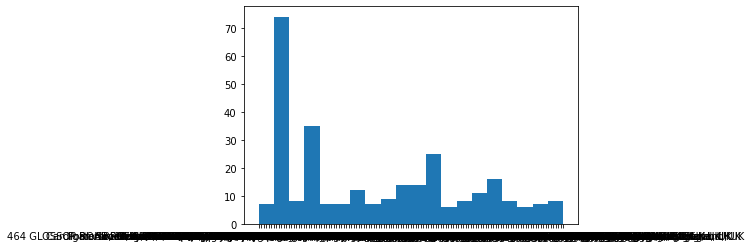

----------------
Name: Agent_landlord_name
Type: object
Unique values: 41
NaN values: 0
0 values: 0


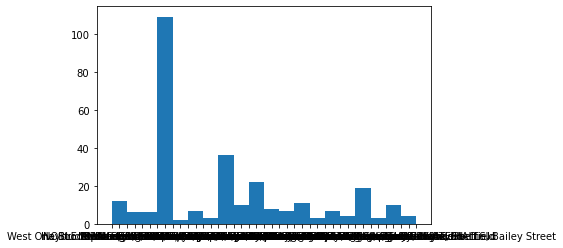

----------------
Name: Description_property
Type: object
Unique values: 154
NaN values: 0
0 values: 0


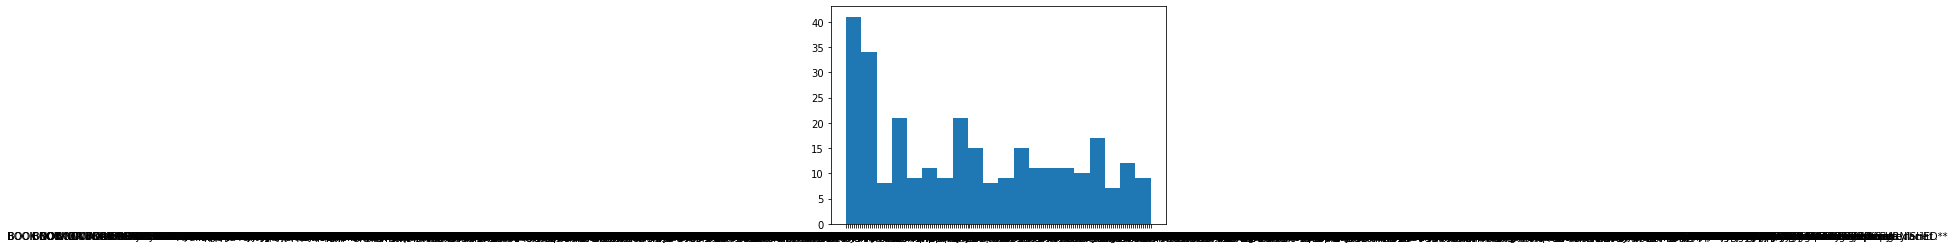

----------------
Name: RM_website_update
Type: object
Unique values: 96
NaN values: 0
0 values: 0


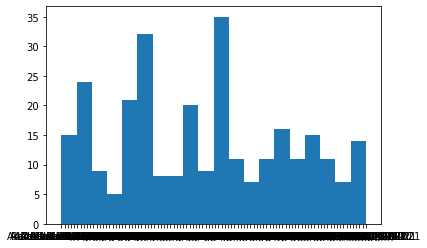

----------------
Name: Price
Type: object
Unique values: 112
NaN values: 0
0 values: 0


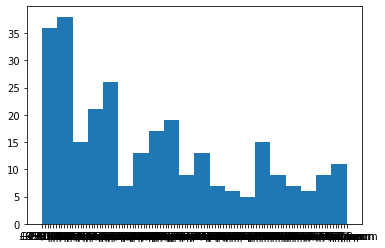

----------------
Name: RM_website_shortlink
Type: object
Unique values: 289
NaN values: 0
0 values: 0


KeyboardInterrupt: 

In [283]:
basic_information(rightmove_df).head()

In [284]:
rightmove_df['Property_address'][1]

'Porterbrook Apartments, Pear St, Sheffield, S11, South Yorkshire, England, UK'

In [285]:
rightmove_df['Property_address'][5]

'Broomhall Street, Sheffield, S3, South Yorkshire, England, UK'

In [286]:
rightmove_df['Property_type'].unique()

array(['Studio', 'House', 'Apartment', 'Flat', 'Penthouse',
       'Private Halls'], dtype=object)

In [287]:

rightmove_df['Property_type'].value_counts()

Apartment        115
Studio            60
Flat              56
House             45
Private Halls     12
Penthouse          1
Name: Property_type, dtype: int64

In [288]:
rightmove_df['Agent_landlord_name'].value_counts()

NOBLE LIVING (SHEFFIELD) LIMITED, Sheffield                  108
MAF Properties, Sheffield                                     35
Xenia Students, Sovereign Newbank                             18
Accommodation.co.uk, covering National                        12
West One Student Accommodation, Sheffield                     11
Shefflets, Sheffield                                          10
Severns Rentals, Sheffield Star                               10
Fusion Students - Private Halls, Sheffield                     8
Hallam Hills ltd, Hallam Hills - Student                       7
Fit Property, Sheffield                                        6
Smart Moves, Bradford                                          5
Nicholas Humphreys, Sheffield                                  5
Igloo Accommodation, Sheffield                                 5
Belvoir, Sheffield                                             4
Tapton Estates, Sheffield                                      4
Blundells, Sheffield     

In [289]:
rightmove_df['Property_Type_det'].value_counts()

1 Studio                   60
1 Bedroom Apartment        36
1 Bedroom Flat             23
3 Bedroom Apartment        23
1 Bedroom House            21
2 Bedroom Apartment        19
4 Bedroom Apartment        18
5 Bedroom Apartment        12
5 Bedroom House            10
4 Bedroom Flat              9
4 Bedroom House             7
7 Bedroom Flat              7
2 Bedroom Flat              7
1 Private Halls             6
6 Bedroom Apartment         5
1 Bedroom Private Halls     4
3 Bedroom Flat              4
3 Bedroom House             3
5 Bedroom Flat              3
6 Bedroom House             3
6 Bedroom Private Halls     2
7 Bedroom Apartment         2
6 Bedroom Flat              2
1 Bedroom Penthouse         1
8 Bedroom Flat              1
12 Bedroom House            1
Name: Property_Type_det, dtype: int64

In [290]:
rightmove_df['RM_website_shortlink']

0      /properties/112541735#/?channel=STU_LET
1       /properties/88183136#/?channel=STU_LET
2      /properties/113784371#/?channel=STU_LET
3      /properties/113758145#/?channel=STU_LET
4      /properties/113743484#/?channel=STU_LET
                        ...                   
284    /properties/113493239#/?channel=STU_LET
285     /properties/89158984#/?channel=STU_LET
286     /properties/88247893#/?channel=STU_LET
287     /properties/73890265#/?channel=STU_LET
288     /properties/87991702#/?channel=STU_LET
Name: RM_website_shortlink, Length: 289, dtype: object

In [291]:
rightmove_df['RM_website_link'][3]

'https://www.rightmove.co.uk/properties/113758145#/?channel=STU_LET'

In [292]:
rightmove_df['RM_website_link']

0      https://www.rightmove.co.uk/properties/1125417...
1      https://www.rightmove.co.uk/properties/8818313...
2      https://www.rightmove.co.uk/properties/1137843...
3      https://www.rightmove.co.uk/properties/1137581...
4      https://www.rightmove.co.uk/properties/1137434...
                             ...                        
284    https://www.rightmove.co.uk/properties/1134932...
285    https://www.rightmove.co.uk/properties/8915898...
286    https://www.rightmove.co.uk/properties/8824789...
287    https://www.rightmove.co.uk/properties/7389026...
288    https://www.rightmove.co.uk/properties/8799170...
Name: RM_website_link, Length: 289, dtype: object

In [293]:
rightmove_df['Bedrm_n']

0      1
1      1
2      1
3      5
4      1
      ..
284    6
285    1
286    1
287    1
288    1
Name: Bedrm_n, Length: 289, dtype: object

In [294]:
rightmove_df['RM_website_update']

0        Added on 27/08/2021
1        Added on 21/09/2021
2        Added on 21/09/2021
3        Added on 20/09/2021
4        Added on 20/09/2021
               ...          
284      Added on 27/03/2021
285    Reduced on 24/03/2021
286    Reduced on 24/03/2021
287    Reduced on 24/03/2021
288    Reduced on 24/03/2021
Name: RM_website_update, Length: 289, dtype: object

In [295]:
rightmove_df['RM_website_update'].value_counts()

Reduced on 21/07/2021    18
Reduced on 15/09/2021    12
Reduced on 26/08/2021    12
Reduced on 20/08/2021    10
Reduced on 03/09/2021    10
                         ..
Added on 19/07/2021       1
Reduced on 13/07/2021     1
Added on 03/08/2021       1
Added on 11/05/2021       1
Reduced on 07/05/2021     1
Name: RM_website_update, Length: 96, dtype: int64

In [296]:
rightmove_df['RM_website_update_date'].value_counts()

2021-07-21    18
2021-08-26    16
2021-09-15    14
2021-06-22    11
2021-08-20    11
              ..
2021-07-01     1
2021-04-07     1
2021-07-15     1
2021-04-13     1
2021-07-19     1
Name: RM_website_update_date, Length: 78, dtype: int64

In [298]:
print(rightmove_df['RM_website_update_date'].min())

print(rightmove_df['RM_website_update_date'].max())


2020-11-02 00:00:00
2021-09-21 00:00:00


In [299]:
rightmove_df[(rightmove_df['Property_Type_det'].str.contains('Property'))]

,Property_address,Agent_landlord_name,Description_property,RM_website_update,Price,RM_website_shortlink,Property_Type_det,Bedrm_n,Property_type,Price_Clean,Price_ppw,Price_ppm,RM_website_link,RM_website_update_status,RM_website_update_Date,RM_website_update_date


In [300]:
rightmove_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Property_address          289 non-null    object        
 1   Agent_landlord_name       289 non-null    object        
 2   Description_property      289 non-null    object        
 3   RM_website_update         289 non-null    object        
 4   Price                     289 non-null    object        
 5   RM_website_shortlink      289 non-null    object        
 6   Property_Type_det         289 non-null    object        
 7   Bedrm_n                   289 non-null    object        
 8   Property_type             289 non-null    object        
 9   Price_Clean               289 non-null    float64       
 10  Price_ppw                 289 non-null    float64       
 11  Price_ppm                 289 non-null    float64       
 12  RM_website_link       

In [301]:
rightmove_df.nunique()

Property_address            123
Agent_landlord_name          41
Description_property        154
RM_website_update            96
Price                       112
RM_website_shortlink        289
Property_Type_det            26
Bedrm_n                       9
Property_type                 6
Price_Clean                 110
Price_ppw                   110
Price_ppm                   110
RM_website_link             289
RM_website_update_status      2
RM_website_update_Date       78
RM_website_update_date       78
dtype: int64

In [302]:
rightmove_df

,Property_address,Agent_landlord_name,Description_property,RM_website_update,Price,RM_website_shortlink,Property_Type_det,Bedrm_n,Property_type,Price_Clean,Price_ppw,Price_ppm,RM_website_link,RM_website_update_status,RM_website_update_Date,RM_website_update_date
0,"Sovereign House, Queen Street, S1, South Yorks...","Haybrook Lettings, Sheffield",City Living - Call us on to view this furnishe...,Added on 27/08/2021,£650 pcm,/properties/112541735#/?channel=STU_LET,1 Studio,1,Studio,650.0,150.12,650.0,https://www.rightmove.co.uk/properties/1125417...,Added on,27/08/2021,2021-08-27
1,"Porterbrook Apartments, Pear St, Sheffield, S1...","West One Student Accommodation, Sheffield",AVAILABLE NOW**PORTERBROOK LUXURY APARTMENTS**...,Added on 21/09/2021,£650 pcm,/properties/88183136#/?channel=STU_LET,1 Studio,1,Studio,650.0,150.12,650.0,https://www.rightmove.co.uk/properties/8818313...,Added on,21/09/2021,2021-09-21
2,"Blonk Street, Wicker Riverside, Sheffield, S3,...","Belvoir, Sheffield",Well presented FURNISHED STUDIO flat in the po...,Added on 21/09/2021,£450 pcm,/properties/113784371#/?channel=STU_LET,1 Studio,1,Studio,450.0,103.93,450.0,https://www.rightmove.co.uk/properties/1137843...,Added on,21/09/2021,2021-09-21
3,"Fulton Road, Walkley, S6 3JL, South Yorkshire,...","MorfittSmith, Sheffield",A tremendous home for a BIG FAMILY or a GROUP ...,Added on 20/09/2021,£950 pcm,/properties/113758145#/?channel=STU_LET,5 Bedroom House,5,House,950.0,219.40,950.0,https://www.rightmove.co.uk/properties/1137581...,Added on,20/09/2021,2021-09-20
4,"Cardigan House, Adelaide Lane, S3 8BR - Viewin...","MorfittSmith, Sheffield",A wonderfully presented 1-bed apartment in one...,Added on 20/09/2021,£585 pcm,/properties/113743484#/?channel=STU_LET,1 Bedroom Apartment,1,Apartment,585.0,135.10,585.0,https://www.rightmove.co.uk/properties/1137434...,Added on,20/09/2021,2021-09-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,"Apt 1, 112 Ecclesall Road, South Yorkshire, En...","MAF Properties, Sheffield",This apartment is finished to the highest stan...,Added on 27/03/2021,"£2,600 pcm",/properties/113493239#/?channel=STU_LET,6 Bedroom Apartment,6,Apartment,2600.0,600.46,2600.0,https://www.rightmove.co.uk/properties/1134932...,Added on,27/03/2021,2021-03-27
285,"60 Priestley Street , , , South Yorkshire, Eng...","Smart Moves, Bradford",These Apartments are in High Demand Please Cal...,Reduced on 24/03/2021,£607 pcm,/properties/89158984#/?channel=STU_LET,1 Studio,1,Studio,607.0,140.18,607.0,https://www.rightmove.co.uk/properties/8915898...,Reduced on,24/03/2021,2021-03-24
286,"Priestley Street / Charlotte Road, , Sheffield...","Smart Moves, Bradford",***BILLS INCLUDED- NO ADMIN FEES*** Welcome to...,Reduced on 24/03/2021,£585 pcm,/properties/88247893#/?channel=STU_LET,1 Studio,1,Studio,585.0,135.10,585.0,https://www.rightmove.co.uk/properties/8824789...,Reduced on,24/03/2021,2021-03-24
287,"Priestley Street / Charlotte Road, , Sheffield...","Smart Moves, Bradford",***BILLS INCLUDED- NO ADMIN FEES*** Welcome to...,Reduced on 24/03/2021,£585 pcm,/properties/73890265#/?channel=STU_LET,1 Studio,1,Studio,585.0,135.10,585.0,https://www.rightmove.co.uk/properties/7389026...,Reduced on,24/03/2021,2021-03-24


In [303]:
#dropping: duplicates, Prop tpes & price
drop_list=['Price', 'Price_Clean', 'RM_website_shortlink', 'RM_website_update_status', 'RM_website_update_Date']

dropping(rightmove_df,drop_list)

In [304]:
#Re order columns
rightmove_df = rightmove_df[[ 'Agent_landlord_name', 'Property_Type_det','Property_type', 'Bedrm_n', 'Price_ppw','Price_ppm', 'Property_address', 'Description_property', 'RM_website_update', 'RM_website_update_date', 'RM_website_link']]
rightmove_df



,Agent_landlord_name,Property_Type_det,Property_type,Bedrm_n,Price_ppw,Price_ppm,Property_address,Description_property,RM_website_update,RM_website_update_date,RM_website_link
0,"Haybrook Lettings, Sheffield",1 Studio,Studio,1,150.12,650.0,"Sovereign House, Queen Street, S1, South Yorks...",City Living - Call us on to view this furnishe...,Added on 27/08/2021,2021-08-27,https://www.rightmove.co.uk/properties/1125417...
1,"West One Student Accommodation, Sheffield",1 Studio,Studio,1,150.12,650.0,"Porterbrook Apartments, Pear St, Sheffield, S1...",AVAILABLE NOW**PORTERBROOK LUXURY APARTMENTS**...,Added on 21/09/2021,2021-09-21,https://www.rightmove.co.uk/properties/8818313...
2,"Belvoir, Sheffield",1 Studio,Studio,1,103.93,450.0,"Blonk Street, Wicker Riverside, Sheffield, S3,...",Well presented FURNISHED STUDIO flat in the po...,Added on 21/09/2021,2021-09-21,https://www.rightmove.co.uk/properties/1137843...
3,"MorfittSmith, Sheffield",5 Bedroom House,House,5,219.40,950.0,"Fulton Road, Walkley, S6 3JL, South Yorkshire,...",A tremendous home for a BIG FAMILY or a GROUP ...,Added on 20/09/2021,2021-09-20,https://www.rightmove.co.uk/properties/1137581...
4,"MorfittSmith, Sheffield",1 Bedroom Apartment,Apartment,1,135.10,585.0,"Cardigan House, Adelaide Lane, S3 8BR - Viewin...",A wonderfully presented 1-bed apartment in one...,Added on 20/09/2021,2021-09-20,https://www.rightmove.co.uk/properties/1137434...
...,...,...,...,...,...,...,...,...,...,...,...
284,"MAF Properties, Sheffield",6 Bedroom Apartment,Apartment,6,600.46,2600.0,"Apt 1, 112 Ecclesall Road, South Yorkshire, En...",This apartment is finished to the highest stan...,Added on 27/03/2021,2021-03-27,https://www.rightmove.co.uk/properties/1134932...
285,"Smart Moves, Bradford",1 Studio,Studio,1,140.18,607.0,"60 Priestley Street , , , South Yorkshire, Eng...",These Apartments are in High Demand Please Cal...,Reduced on 24/03/2021,2021-03-24,https://www.rightmove.co.uk/properties/8915898...
286,"Smart Moves, Bradford",1 Studio,Studio,1,135.10,585.0,"Priestley Street / Charlotte Road, , Sheffield...",***BILLS INCLUDED- NO ADMIN FEES*** Welcome to...,Reduced on 24/03/2021,2021-03-24,https://www.rightmove.co.uk/properties/8824789...
287,"Smart Moves, Bradford",1 Studio,Studio,1,135.10,585.0,"Priestley Street / Charlotte Road, , Sheffield...",***BILLS INCLUDED- NO ADMIN FEES*** Welcome to...,Reduced on 24/03/2021,2021-03-24,https://www.rightmove.co.uk/properties/7389026...


-----

In [305]:
rightmove_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Agent_landlord_name     289 non-null    object        
 1   Property_Type_det       289 non-null    object        
 2   Property_type           289 non-null    object        
 3   Bedrm_n                 289 non-null    object        
 4   Price_ppw               289 non-null    float64       
 5   Price_ppm               289 non-null    float64       
 6   Property_address        289 non-null    object        
 7   Description_property    289 non-null    object        
 8   RM_website_update       289 non-null    object        
 9   RM_website_update_date  289 non-null    datetime64[ns]
 10  RM_website_link         289 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 25.0+ KB


In [316]:
rightmove_df.shape

(289, 11)

In [307]:
rightmove_dfsave=rightmove_df
rightmove_dfsave.to_csv(file_preproc, index=False)

In [309]:
## update master dataset

#with open(master_preproc, 'a') as f:
#    rightmove_df_master.to_csv(f, header=False)

In [314]:
rightmove_df.to_csv(master_preproc, mode='a', header=False)

In [375]:
rightmove_df_master

,Agent_landlord_name,Property_Type_det,Property_type,Bedrm_n,Price_ppw,Price_ppm,Property_address,Description_property,RM_website_update,RM_website_update_date,RM_website_link
0,"Haybrook Lettings, Sheffield",1 Studio,Studio,1,150.12,650.0,"Sovereign House, Queen Street, S1, South Yorks...",City Living - Call us on to view this furnishe...,Added on 27/08/2021,2021-08-27,https://www.rightmove.co.uk/properties/1125417...
1,"West One Student Accommodation, Sheffield",1 Studio,Studio,1,150.12,650.0,"Porterbrook Apartments, Pear St, Sheffield, S1...",AVAILABLE NOW**PORTERBROOK LUXURY APARTMENTS**...,Added on 21/09/2021,2021-09-21,https://www.rightmove.co.uk/properties/8818313...
2,"Belvoir, Sheffield",1 Studio,Studio,1,103.93,450.0,"Blonk Street, Wicker Riverside, Sheffield, S3,...",Well presented FURNISHED STUDIO flat in the po...,Added on 21/09/2021,2021-09-21,https://www.rightmove.co.uk/properties/1137843...
3,"MorfittSmith, Sheffield",5 Bedroom House,House,5,219.40,950.0,"Fulton Road, Walkley, S6 3JL, South Yorkshire,...",A tremendous home for a BIG FAMILY or a GROUP ...,Added on 20/09/2021,2021-09-20,https://www.rightmove.co.uk/properties/1137581...
4,"MorfittSmith, Sheffield",1 Bedroom Apartment,Apartment,1,135.10,585.0,"Cardigan House, Adelaide Lane, S3 8BR - Viewin...",A wonderfully presented 1-bed apartment in one...,Added on 20/09/2021,2021-09-20,https://www.rightmove.co.uk/properties/1137434...
...,...,...,...,...,...,...,...,...,...,...,...
284,"MAF Properties, Sheffield",6 Bedroom Apartment,Apartment,6,600.46,2600.0,"Apt 1, 112 Ecclesall Road, South Yorkshire, En...",This apartment is finished to the highest stan...,Added on 27/03/2021,2021-03-27,https://www.rightmove.co.uk/properties/1134932...
285,"Smart Moves, Bradford",1 Studio,Studio,1,140.18,607.0,"60 Priestley Street , , , South Yorkshire, Eng...",These Apartments are in High Demand Please Cal...,Reduced on 24/03/2021,2021-03-24,https://www.rightmove.co.uk/properties/8915898...
286,"Smart Moves, Bradford",1 Studio,Studio,1,135.10,585.0,"Priestley Street / Charlotte Road, , Sheffield...",***BILLS INCLUDED- NO ADMIN FEES*** Welcome to...,Reduced on 24/03/2021,2021-03-24,https://www.rightmove.co.uk/properties/8824789...
287,"Smart Moves, Bradford",1 Studio,Studio,1,135.10,585.0,"Priestley Street / Charlotte Road, , Sheffield...",***BILLS INCLUDED- NO ADMIN FEES*** Welcome to...,Reduced on 24/03/2021,2021-03-24,https://www.rightmove.co.uk/properties/7389026...


In [318]:
#check

rightmove_df_master = pd.read_csv(master_preproc)
rightmove_df_master


,Agent_landlord_name,Property_Type_det,Property_type,Bedrm_n,Price_ppw,Price_ppm,Property_address,Description_property,RM_website_update,RM_website_update_date,RM_website_link
0,"Haybrook Lettings, Sheffield",1 Studio,Studio,1,150.12,650.0,"Sovereign House, Queen Street, S1, South Yorks...",City Living - Call us on to view this furnishe...,Added on 27/08/2021,2021-08-27,https://www.rightmove.co.uk/properties/1125417...
1,"West One Student Accommodation, Sheffield",1 Studio,Studio,1,150.12,650.0,"Porterbrook Apartments, Pear St, Sheffield, S1...",AVAILABLE NOW**PORTERBROOK LUXURY APARTMENTS**...,Added on 21/09/2021,2021-09-21,https://www.rightmove.co.uk/properties/8818313...
2,"Belvoir, Sheffield",1 Studio,Studio,1,103.93,450.0,"Blonk Street, Wicker Riverside, Sheffield, S3,...",Well presented FURNISHED STUDIO flat in the po...,Added on 21/09/2021,2021-09-21,https://www.rightmove.co.uk/properties/1137843...
3,"MorfittSmith, Sheffield",5 Bedroom House,House,5,219.40,950.0,"Fulton Road, Walkley, S6 3JL, South Yorkshire,...",A tremendous home for a BIG FAMILY or a GROUP ...,Added on 20/09/2021,2021-09-20,https://www.rightmove.co.uk/properties/1137581...
4,"MorfittSmith, Sheffield",1 Bedroom Apartment,Apartment,1,135.10,585.0,"Cardigan House, Adelaide Lane, S3 8BR - Viewin...",A wonderfully presented 1-bed apartment in one...,Added on 20/09/2021,2021-09-20,https://www.rightmove.co.uk/properties/1137434...
...,...,...,...,...,...,...,...,...,...,...,...
284,"MAF Properties, Sheffield",6 Bedroom Apartment,Apartment,6,600.46,2600.0,"Apt 1, 112 Ecclesall Road, South Yorkshire, En...",This apartment is finished to the highest stan...,Added on 27/03/2021,2021-03-27,https://www.rightmove.co.uk/properties/1134932...
285,"Smart Moves, Bradford",1 Studio,Studio,1,140.18,607.0,"60 Priestley Street , , , South Yorkshire, Eng...",These Apartments are in High Demand Please Cal...,Reduced on 24/03/2021,2021-03-24,https://www.rightmove.co.uk/properties/8915898...
286,"Smart Moves, Bradford",1 Studio,Studio,1,135.10,585.0,"Priestley Street / Charlotte Road, , Sheffield...",***BILLS INCLUDED- NO ADMIN FEES*** Welcome to...,Reduced on 24/03/2021,2021-03-24,https://www.rightmove.co.uk/properties/8824789...
287,"Smart Moves, Bradford",1 Studio,Studio,1,135.10,585.0,"Priestley Street / Charlotte Road, , Sheffield...",***BILLS INCLUDED- NO ADMIN FEES*** Welcome to...,Reduced on 24/03/2021,2021-03-24,https://www.rightmove.co.uk/properties/7389026...
